In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
import tensorflow as tf

train_dir = r'C:\Users\potnu\Downloads\archive (2)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'
valid_dir = r'C:\Users\potnu\Downloads\archive (2)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid'

IMG_SIZE = 128
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Only use limited steps for quicker training
history = model.fit(
    train_generator,
    steps_per_epoch=150,  # reduced steps
    validation_data=val_generator,
    validation_steps=30,
    epochs=3
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 33s 4us/step


c:\Users\potnu\anaconda3\envs\tf-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
150/150 ━━━━━━━━━━━━━━━━━━━━ 117s 754ms/step - accuracy: 0.5044 - loss: 1.9810 - val_accuracy: 0.8833 - val_loss: 0.4297
Epoch 2/3
150/150 ━━━━━━━━━━━━━━━━━━━━ 108s 721ms/step - accuracy: 0.8346 - loss: 0.5181 - val_accuracy: 0.8740 - val_loss: 0.3915
Epoch 3/3
150/150 ━━━━━━━━━━━━━━━━━━━━ 115s 769ms/step - accuracy: 0.8717 - loss: 0.4139 - val_accuracy: 0.8177 - val_loss: 0.5741


In [ ]:

model.save('backend/models/plant_disease_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [ ]:

import json
class_names = list(train_generator.class_indices.keys())
with open('backend/models/class_names.json', 'w') as f:
    json.dump(class_names, f)
print("Class names saved successfully!")

Class names saved successfully!


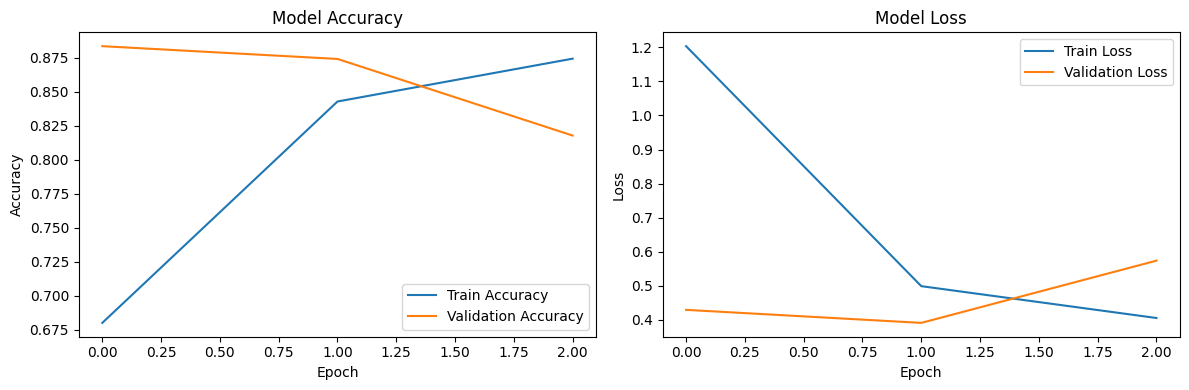

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
test_dir = r'C:\Users\potnu\Downloads\archive (2)\test\test'

Found 33 test images.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


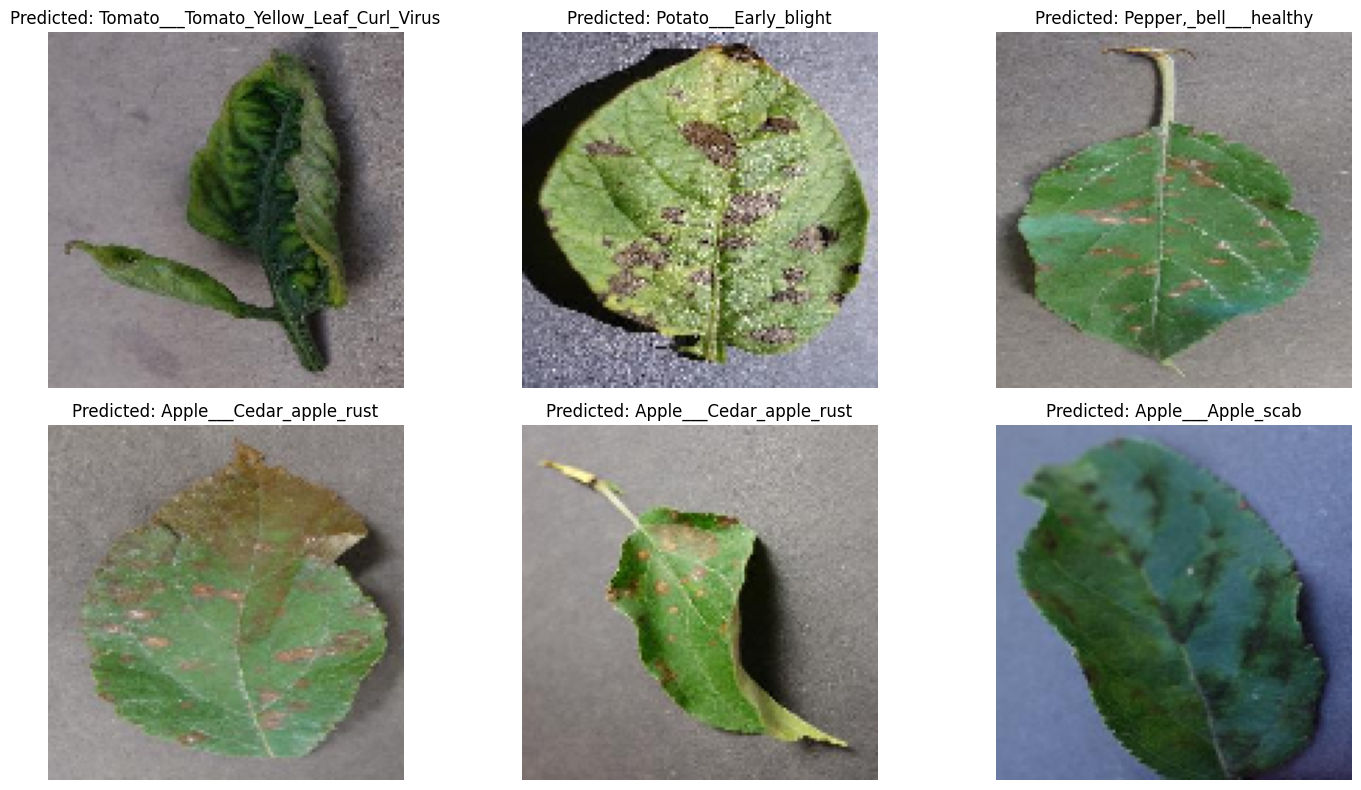

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

model = load_model('backend/models/plant_disease_model.h5')

with open('backend/models/class_names.json', 'r') as f:
    class_names = json.load(f)

IMG_SIZE = 128  # image size used during training

test_dir = r'C:\Users\potnu\Downloads\archive (2)\test\test'

all_test_images = [os.path.join(test_dir, f) for f in os.listdir(test_dir)
                   if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"Found {len(all_test_images)} test images.")

if len(all_test_images) == 0:
    print("⚠️ No images found in test folder!")
else:
    
    num_images = min(6, len(all_test_images))
    selected_images = random.sample(all_test_images, num_images)

    
    plt.figure(figsize=(15, 8))
    for i, img_path in enumerate(selected_images):
        
        img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img) / 255.0  # normalize
        img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

        
        predictions = model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]

        
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


Found 33 test images.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


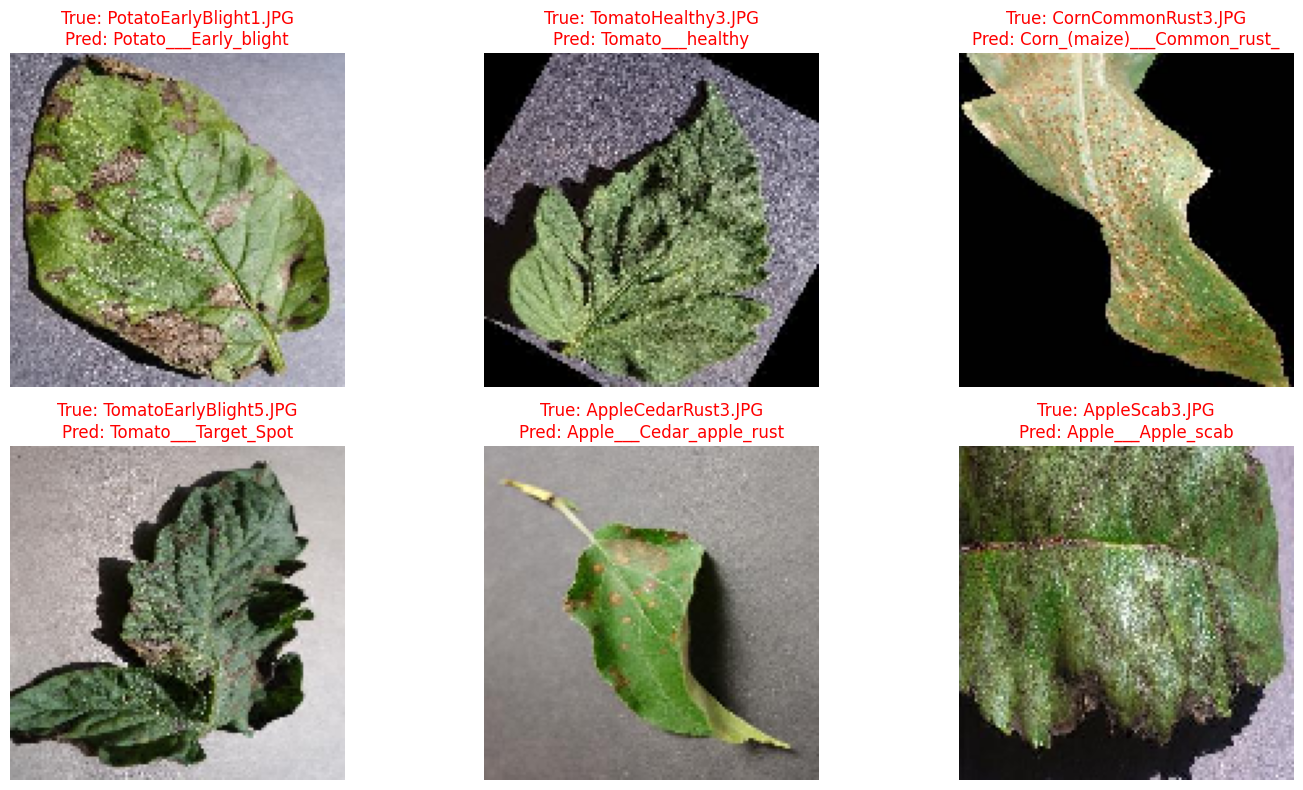

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

model = load_model('backend/models/plant_disease_model.h5')

with open('backend/models/class_names.json', 'r') as f:
    class_names = json.load(f)

IMG_SIZE = 128  

test_dir = r'C:\Users\potnu\Downloads\archive (2)\test\test'


all_test_images = [os.path.join(test_dir, f) for f in os.listdir(test_dir)
                   if f.lower().endswith(('.png', '.jpg', '.jpeg'))]


print(f"Found {len(all_test_images)} test images.")

if len(all_test_images) == 0:
    print("⚠️ No images found in test folder!")
else:
    
    num_images = min(6, len(all_test_images))
    selected_images = random.sample(all_test_images, num_images)

    
    plt.figure(figsize=(15, 8))
    for i, img_path in enumerate(selected_images):
        filename = os.path.basename(img_path)

        
        true_label = filename.split('___')[0].strip()

        
        img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        
        predictions = model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]

        
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        title_color = 'green' if predicted_class.startswith(true_label) else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_class}", color=title_color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


Found 33 test images.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


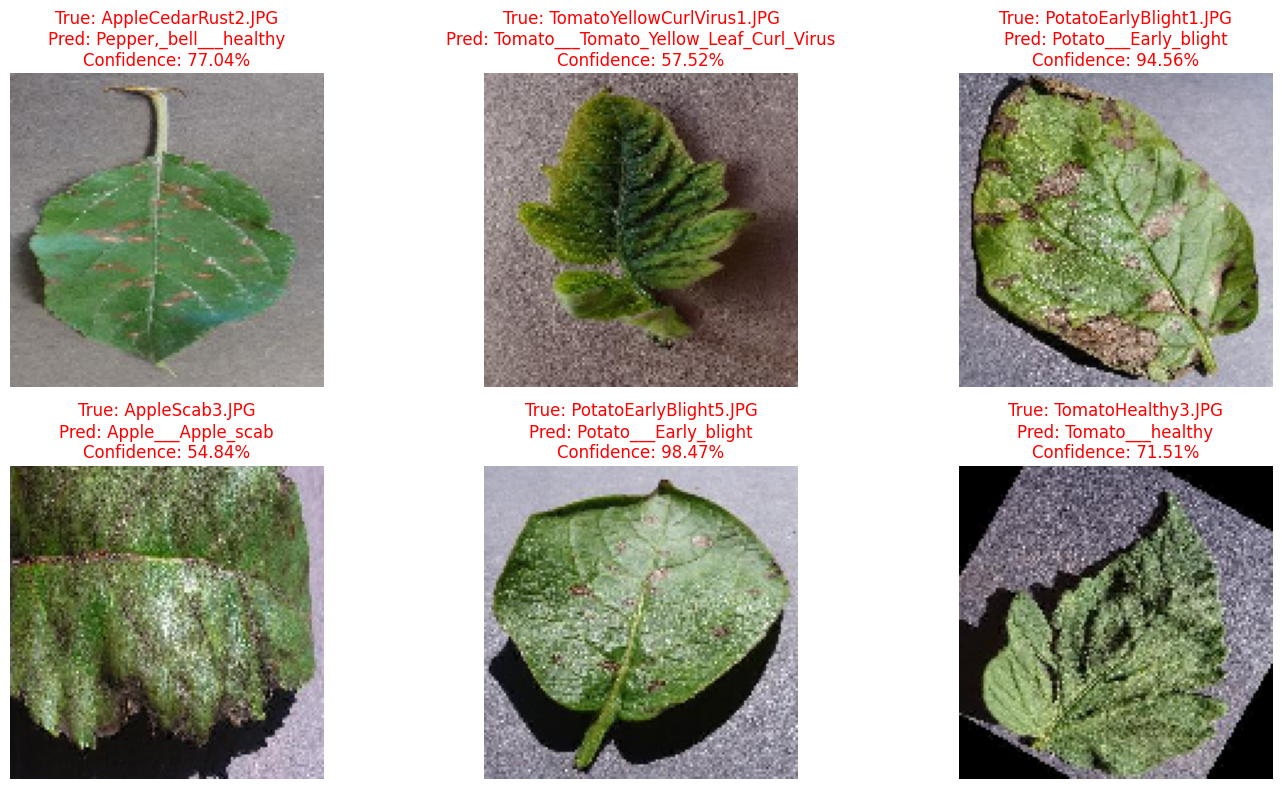

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


model = load_model('backend/models/plant_disease_model.h5')

with open('backend/models/class_names.json', 'r') as f:
    class_names = json.load(f)

IMG_SIZE = 128  # Image size used during training

test_dir = r'C:\Users\potnu\Downloads\archive (2)\test\test'

all_test_images = [os.path.join(test_dir, f) for f in os.listdir(test_dir)
                   if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"Found {len(all_test_images)} test images.")

if len(all_test_images) == 0:
    print("⚠️ No images found in test folder!")
else:
    
    num_images = min(6, len(all_test_images))
    selected_images = random.sample(all_test_images, num_images)

    
    plt.figure(figsize=(15, 8))
    for i, img_path in enumerate(selected_images):
        filename = os.path.basename(img_path)

        
        true_label = filename.split('___')[0].strip()

        
        img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        
        predictions = model.predict(img_array)
        predicted_index = np.argmax(predictions)
        predicted_class = class_names[predicted_index]
        confidence = predictions[0][predicted_index] * 100

        
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        title_color = 'green' if predicted_class.startswith(true_label) else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_class}\nConfidence: {confidence:.2f}%", color=title_color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
